In [361]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

In [329]:
data=np.load("pressures2.npy")
print(data.shape)
col1=data[:,0][0]
col1_x=data[:,1][0]
col2=data[:,0][1]
col2_x=data[:,1][1]
col3=data[:,0][2]
col3_x=data[:,1][2]
col4=data[:,0][3]
col4_x=data[:,1][3]
col5=data[:,0][4]
col5_x=data[:,1][4]

def range_(col):
    return np.round(np.max(col)-np.min(col),2)

print("average",np.round(np.average(col1),2),"&",np.round(np.average(col2),2),"&",np.round(np.average(col3),2),"&",np.round(np.average(col4),2),"&",np.round(np.average(col5),2))
print("median",np.round(np.median(col1),2),"&",np.round(np.median(col2),2),"&",np.round(np.median(col3),2),"&",np.round(np.median(col4),2),"&",np.round(np.median(col5),2))
print("range",np.round(range_(col1),2),"&",np.round(range_(col2),2),"&",np.round(range_(col3),2),"&",np.round(range_(col4),2),"&",np.round(range_(col5),2))
print("std",np.round(np.std(col1),2),"&",np.round(np.std(col2),2),"&",np.round(np.std(col3),2),"&",np.round(np.std(col4),2),"&",np.round(np.std(col5),2))

(30, 2, 5)
average 46.14 & 51.2 & 50.12 & 52.77 & 52.1
median 48.76 & 44.6 & 53.55 & 52.03 & 50.81
range 16.93 & 22.76 & 26.02 & 29.82 & 17.99
std 6.49 & 10.15 & 8.94 & 9.56 & 7.87


In [113]:
log=np.load("errorlog.npy")
x=log[:,0]
print(100 - sum(log[:,1])/len(x[x!=0])*100,"% success")


0.0 % success


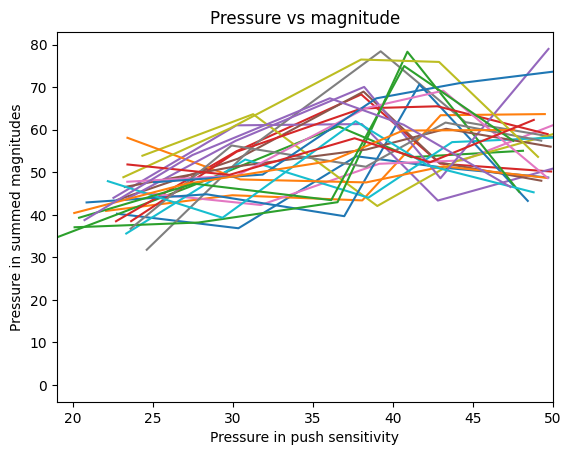

In [326]:
data=np.load("pressures2.npy")
CM=1
ST=0.2
for i in range(len(data)):
    plt.plot(data[:,1][i]/200,data[:,0][i])

plt.xlim([19,50])
plt.xlabel("Pressure in push sensitivity")
plt.ylabel("Pressure in summed magnitudes")
plt.title("Pressure vs magnitude")
plt.show()


## Modelling data 

In [347]:
vecs=np.load("vectors.npy")

classes=data[:,1][0]/200
def find_nearest(array, value): #return class
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

SIZE=20
X_data=vecs[0:SIZE].reshape((len(vecs[0:SIZE])*vecs.shape[1],vecs.shape[2]*2))
y_data=data[:,1][0:SIZE].flatten()/200
y=[]
for i in range(len(X_data)):
    ax=np.zeros((5,))
    ax[i%5]=1
    y.append(ax)
y=np.array(y)
print(X_data.shape)
print(y_data.shape)

(100, 218)
(100,)


In [366]:
reg = LinearRegression().fit(X_data, y_data)
print("Score on training",reg.score(X_data, y_data))
dist=0
for i in range(50):
    num=random.randint(0,4)
    n=random.randint(20,24)
    dat=vecs[n][num].reshape(1,vecs.shape[2]*2)
    #print("Predicted",reg.predict(np.array(dat)),"Actual:",data[:,1][n][num]/200)
    dist+=abs(data[:,1][n][num]/200-reg.predict(np.array(dat)))
print("Average dist on unseen data:",dist/50)
#np.argmax(reg.predict(X_data),axis=1)

1.0
Average dist on unseen data: [1.16980203]
